# WE INVESTIGATE THE DISTRIBUTION OF CARS ACROSS THE USA & CANADA


In [152]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [153]:
df = pd.read_csv('USA_cars_datasets.csv')
df.head()

,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,6300,toyota,cruiser,2008,clean vehicle,274117,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left
1,2899,ford,se,2011,clean vehicle,190552,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left
2,5350,dodge,mpv,2018,clean vehicle,39590,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left
3,25000,ford,door,2014,clean vehicle,64146,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left
4,27700,chevrolet,1500,2018,clean vehicle,6654,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left


In [154]:
df.drop('vin', axis=1, inplace=True)

In [155]:
df.head()

,price,brand,model,year,title_status,mileage,color,lot,state,country,condition
0,6300,toyota,cruiser,2008,clean vehicle,274117,black,159348797,new jersey,usa,10 days left
1,2899,ford,se,2011,clean vehicle,190552,silver,166951262,tennessee,usa,6 days left
2,5350,dodge,mpv,2018,clean vehicle,39590,silver,167655728,georgia,usa,2 days left
3,25000,ford,door,2014,clean vehicle,64146,blue,167753855,virginia,usa,22 hours left
4,27700,chevrolet,1500,2018,clean vehicle,6654,red,167763266,florida,usa,22 hours left


In [156]:
df.lot = df.lot.astype("category")

In [157]:
df.columns

Index(['price', 'brand', 'model', 'year', 'title_status', 'mileage', 'color',
       'lot', 'state', 'country', 'condition'],
      dtype='object')

In [158]:
len(df.columns)

11

In [159]:
df.shape

(2499, 11)

In [160]:
df.notnull()

,price,brand,model,year,title_status,mileage,color,lot,state,country,condition
0,True,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...
2494,True,True,True,True,True,True,True,True,True,True,True
2495,True,True,True,True,True,True,True,True,True,True,True
2496,True,True,True,True,True,True,True,True,True,True,True
2497,True,True,True,True,True,True,True,True,True,True,True


#### There are no null values.

In [161]:
df.describe()

,price,year,mileage
count,2499.000000,2499.000000,2.499000e+03
mean,18767.671469,2016.714286,5.229869e+04
std,12116.094936,3.442656,5.970552e+04
min,0.000000,1973.000000,0.000000e+00
25%,10200.000000,2016.000000,2.146650e+04
50%,16900.000000,2018.000000,3.536500e+04
75%,25555.500000,2019.000000,6.347250e+04
max,84900.000000,2020.000000,1.017936e+06


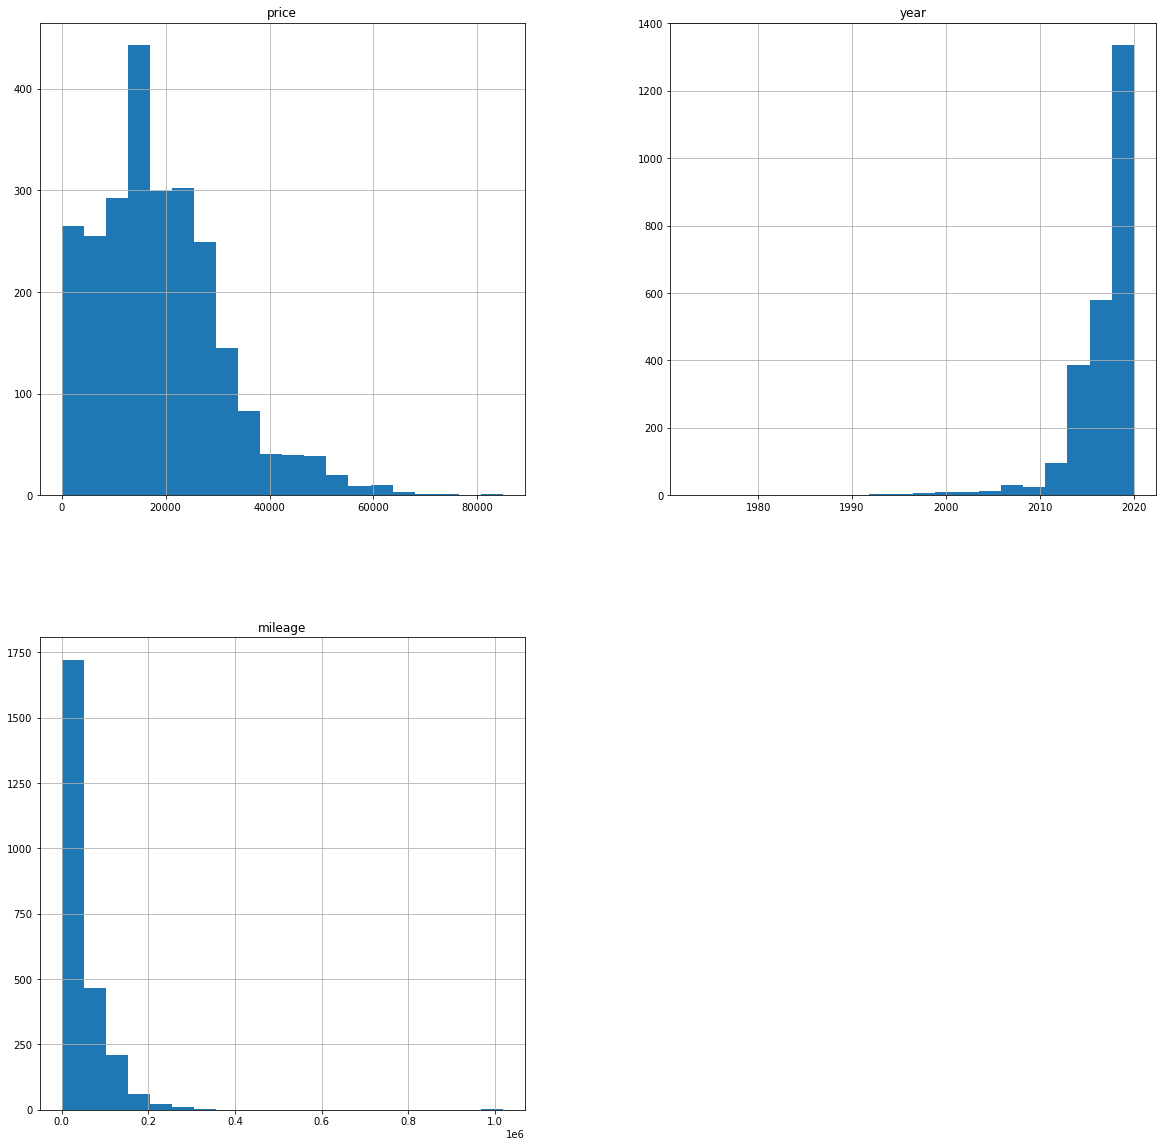

In [162]:
df.hist(figsize=(20,20), bins=20);

#### The histogram shows that the 'price' and 'mileage' are positively skewed while 'year' is negatively skewed.

## WE PLOT A CORRELATION BETWEEN THE NUMBER OF CARS AND PRICES

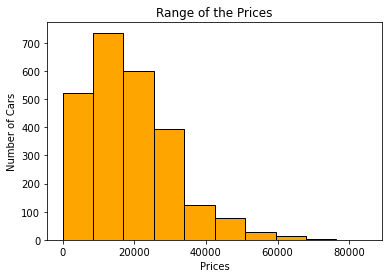

In [163]:
plt.hist(df['price'], color='orange', edgecolor='black',bins=10);
# We add Labels
plt.title('Range of the Prices');
plt.xlabel('Prices');
plt.ylabel('Number of Cars');

### BASED ON CAR BRAND

In [164]:
car_brand = df['brand'].value_counts()
car_brand

ford               1235
dodge               432
nissan              312
chevrolet           297
gmc                  42
jeep                 30
chrysler             18
bmw                  17
hyundai              15
kia                  13
buick                13
honda                12
infiniti             12
mercedes-benz        10
cadillac             10
heartland             5
land                  4
audi                  4
peterbilt             4
acura                 3
lincoln               2
lexus                 2
mazda                 2
toyota                1
ram                   1
maserati              1
jaguar                1
harley-davidson       1
Name: brand, dtype: int64

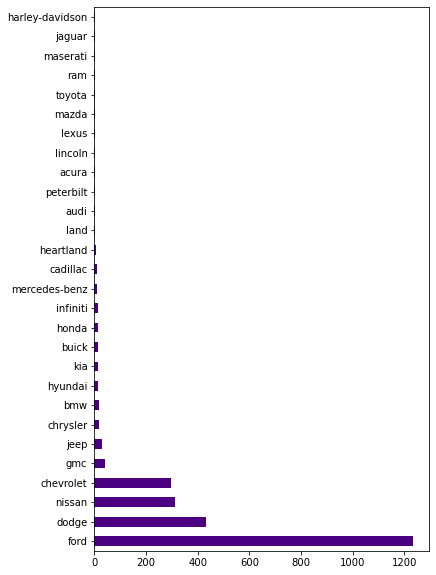

In [165]:
car_brand.plot(color= 'indigo',kind='barh', figsize=(6,10));

#### It is seen that the Ford brand are the most used cars.

## PLOT BASED ON THE TITLE STATUS OF THE CARS

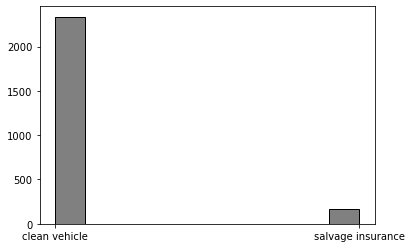

In [166]:
plt.hist(df['title_status'], color='grey', edgecolor='black',bins=10);

## WE SHOW HOW MANY CARS ORIGINATE FROM EACH COUNTRY BASED ON THE DATASET


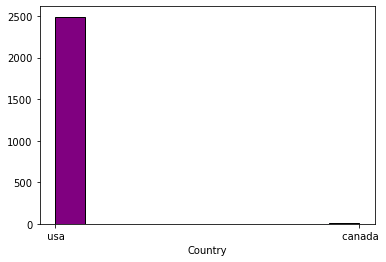

In [167]:
plt.hist(df['country'], color='purple', edgecolor='black', bins=10);
plt.xlabel('Country');

About 97% of the cars are from USA while Canada has about 3%.

## WE INVESTIGATE THE RELATION BETWEEN THE MILEAGE & PRICE OF THE CARS

#### USING SCATTERPLOT

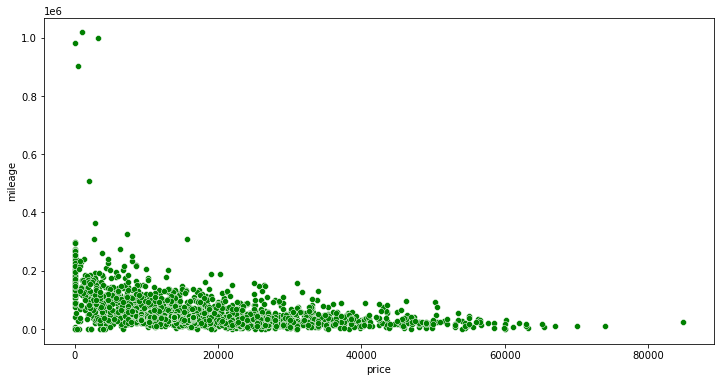

In [168]:
plt.figure(figsize=(12,6))
sns.scatterplot(color='green',x=df['price'], y=df['mileage']);

  #### USING JOINTPLOT

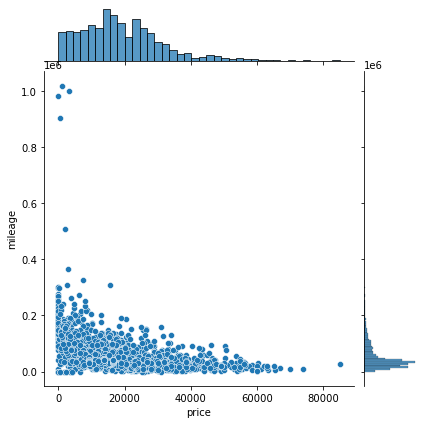

In [169]:
sns.jointplot(x=df['price'], y=df['mileage']);

 ## WE INVESTIGATE THE PRICE RANGE OF VARIOUS CAR MODELS USING SEABORN BOXPLOT

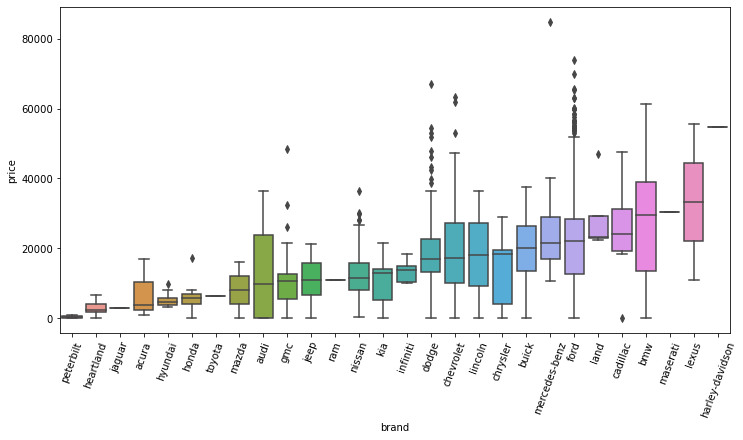

In [170]:
plt.figure(figsize=(12,6));
sorted_nb = df.groupby(['brand'])['price'].median().sort_values();
sns.boxplot(x=df['brand'], y=df['price'], order=list(sorted_nb.index));
plt.xticks(rotation=70);

### WE CLEAN UP THE OUTLIERS IN THE BOX PLOT USING QUANTILE BASED FLOORING AND CAPPING

In [171]:
print(df['price'].skew())
df['price'].describe()

0.9227307836499805


count     2499.000000
mean     18767.671469
std      12116.094936
min          0.000000
25%      10200.000000
50%      16900.000000
75%      25555.500000
max      84900.000000
Name: price, dtype: float64

In [172]:
# We perform the flooring,(the 10th percentile) for the lower values and capping(the 90th percentile) for the higher values.
print(df['price'].quantile(0.10))
print(df['price'].quantile(0.90))

4140.0
33720.00000000003


In [173]:
# We remove the outliers and calculate the skewness again.
df['price'] = np.where(df['price'] <4140.0, 4140.0,df['price'])
df['price'] = np.where(df['price'] >33720.00000000003, 33720.00000000003,df['price'])
print(df['price'].skew())

0.16623747928127253


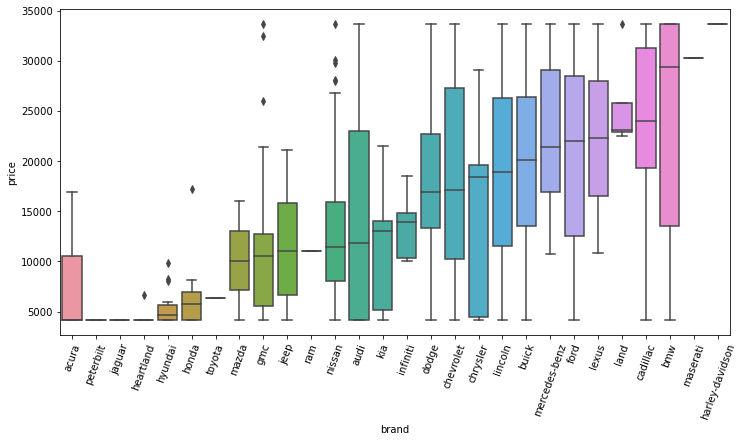

In [174]:
plt.figure(figsize=(12,6));
sorted_nb = df.groupby(['brand'])['price'].median().sort_values();
sns.boxplot(x=df['brand'], y=df['price'], order=list(sorted_nb.index));
plt.xticks(rotation=70);

## WE VISUALIZE HOW MANY CARS COME FROM THE TOP 30 STATES IN USA, AS WELL AS CANADA

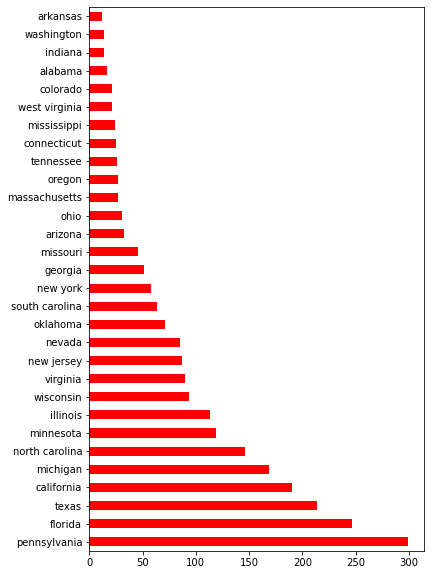

In [175]:
df['state'].value_counts().head(30).plot(color= 'red',kind='barh', figsize=(6,10));

#### It is seen that most of cars come from Pennsylvania in USA.

C:\Users\Valentine Enedah\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


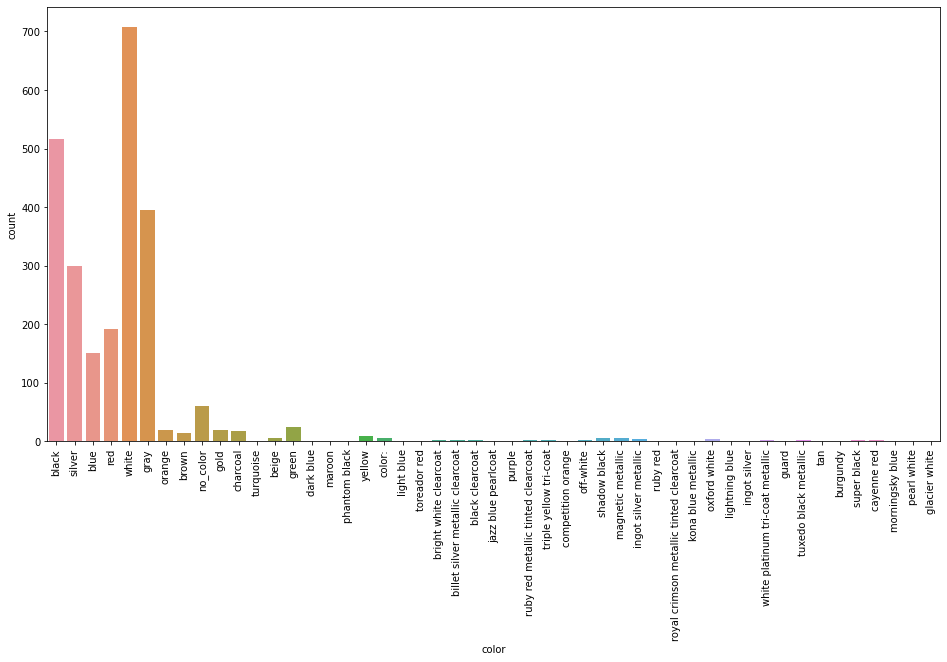

In [176]:
plt.figure(figsize=(16,8));
sns.countplot(df['color']);
plt.xticks(rotation= 90);

#### Most of the cars are white in colour as seen from the countplot.

## THE CORRELATION HEATMAP OF THE DATASET

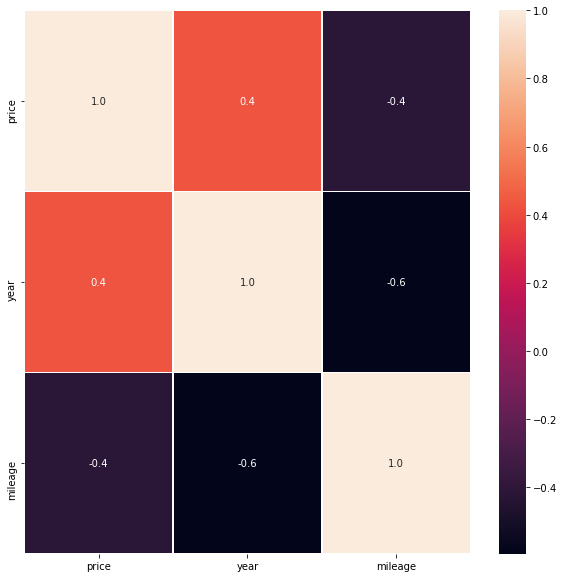

In [177]:
f, ax = plt.subplots(figsize=(10,10));
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f', ax=ax);
plt.show;